In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
print("🚗📊 BMW Car Sales Classification Project")
print("--------------------------------------------------")
print("🎯 Problem Statement:")
print("   The goal is to classify BMW car sales performance levels ")
print("   using available features in the dataset.")
print()
print("⚠️ Challenge:")
print("   - Dropping 'sales_volume' reduces predictability drastically.")
print("   - Remaining features show weak correlation with the target.")
print("   - Even with Random Forest, LightGBM, and SMOTE balancing, ")
print("     the model metrics remain low.")
print()
print("💡 Insight:")
print("   Current features may not capture enough market dynamics.")
print("   Additional data like market value, popularity, competitor sales, ")
print("   and seasonality could strengthen predictive power.")
print()
print("🚀 Next Steps:")
print("   - Perform deeper feature engineering.")
print("   - Enrich dataset with external market/behavioral data.")
print("   - Re-test with advanced ML pipelines for improvement.")

🚗📊 BMW Car Sales Classification Project
--------------------------------------------------
🎯 Problem Statement:
   The goal is to classify BMW car sales performance levels 
   using available features in the dataset.

⚠️ Challenge:
   - Dropping 'sales_volume' reduces predictability drastically.
   - Remaining features show weak correlation with the target.
   - Even with Random Forest, LightGBM, and SMOTE balancing, 
     the model metrics remain low.

💡 Insight:
   Current features may not capture enough market dynamics.
   Additional data like market value, popularity, competitor sales, 
   and seasonality could strengthen predictive power.

🚀 Next Steps:
   - Perform deeper feature engineering.
   - Enrich dataset with external market/behavioral data.
   - Re-test with advanced ML pipelines for improvement.


In [20]:
# --------------------------------------------------
# 🧹 Data Cleaning & Preprocessing for BMW Car Sales
# --------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# 1️⃣ Load dataset
df = pd.read_csv("BMW_Car_Sales_Classification.csv")

# 2️⃣ Quick check of shape and missing values
print("📊 Dataset Shape:", df.shape)
print("❓ Missing Values per Column:\n", df.isnull().sum())

# 3️⃣ Handle duplicates
df.drop_duplicates(inplace=True)

# 4️⃣ Separate features and target
target_col = "Sales_Classification"   
X = df.drop(columns=[target_col])
y = df[target_col]

# 5️⃣ Identify numerical and categorical features
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("🔢 Numerical Features:", list(num_cols))
print("🔤 Categorical Features:", list(cat_cols))

# 6️⃣ Impute missing values
# - Mean strategy for numeric
# - Most frequent for categorical
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# 7️⃣ Encode categorical variables
# Using Label Encoding (you may use OneHotEncoder if needed)
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # store encoders if inverse transform needed

# 8️⃣ Feature Scaling for numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 9️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data cleaning & preprocessing completed!")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

📊 Dataset Shape: (50000, 11)
❓ Missing Values per Column:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64
🔢 Numerical Features: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
🔤 Categorical Features: ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
✅ Data cleaning & preprocessing completed!
Training Set Shape: (40000, 10)
Testing Set Shape: (10000, 10)


In [22]:
df=pd.read_csv('BMW_Car_Sales_Classification.csv')
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [28]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette='pastel')


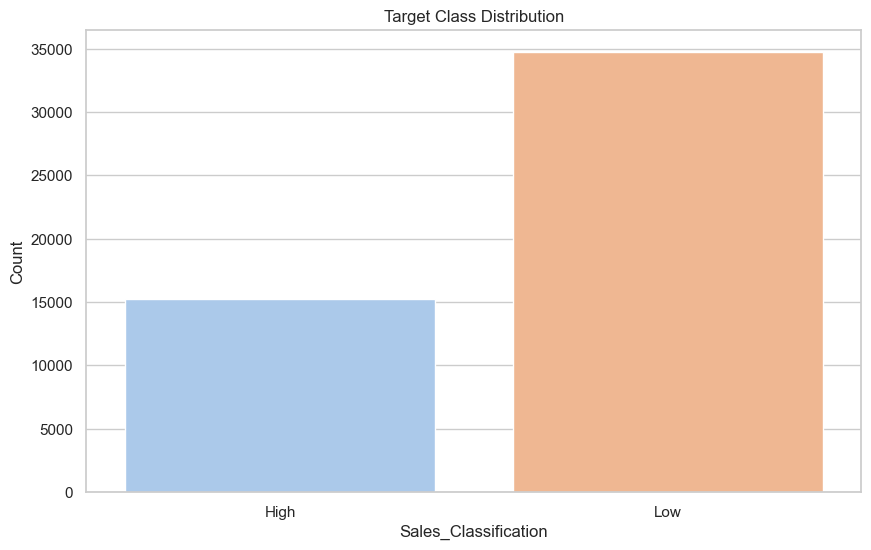

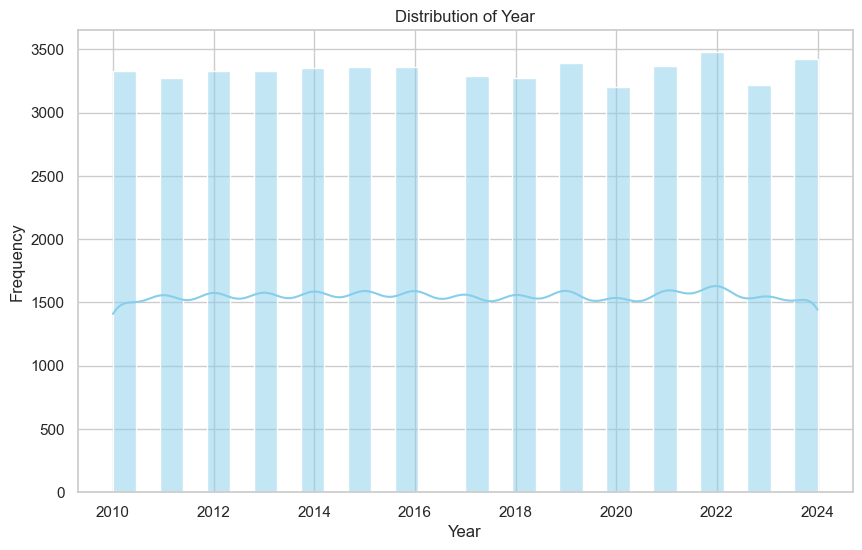

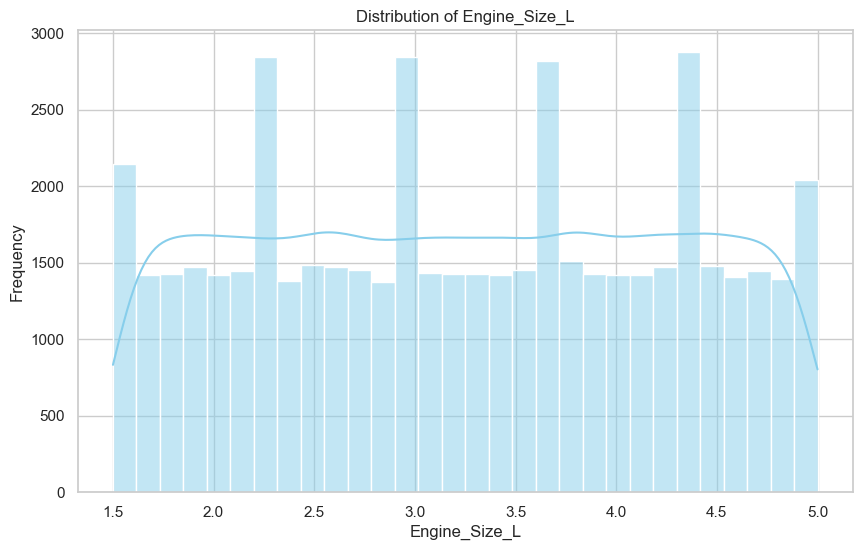

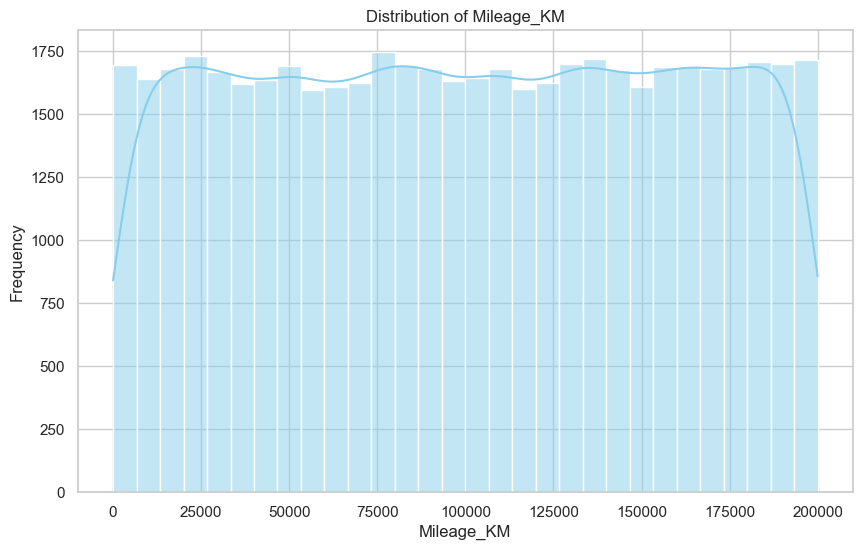

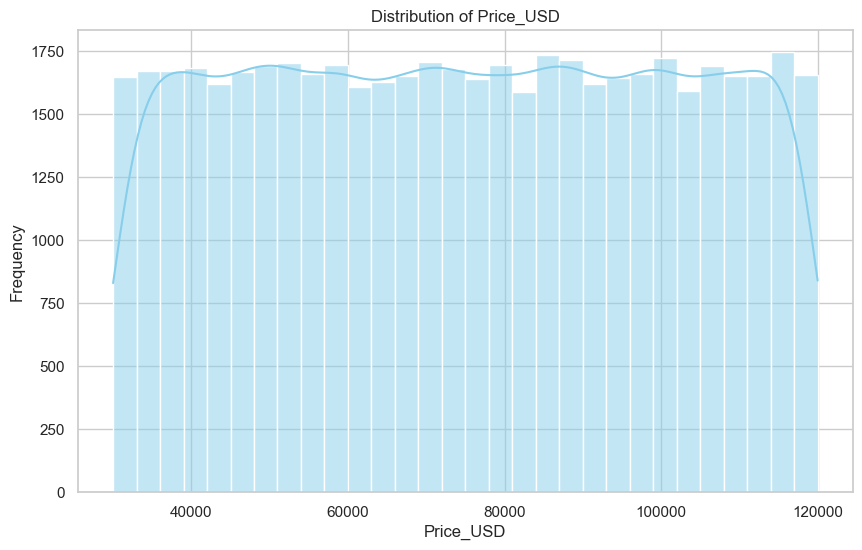

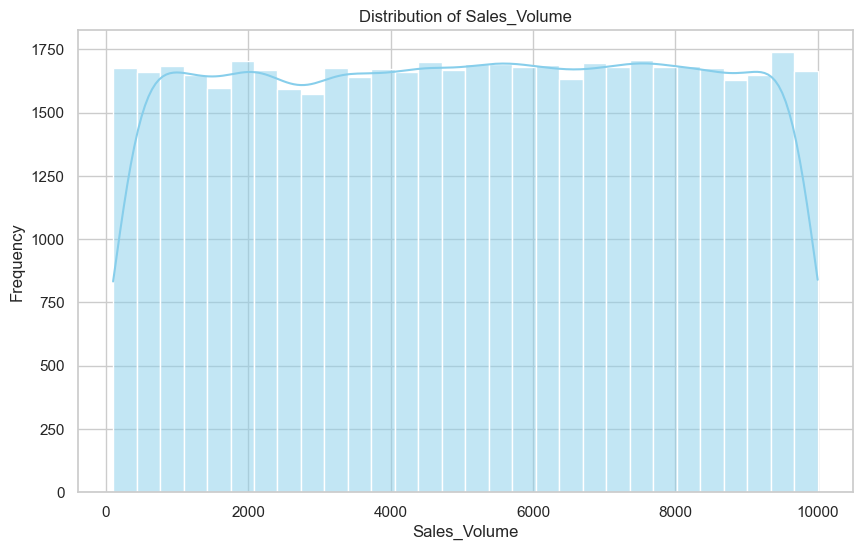

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


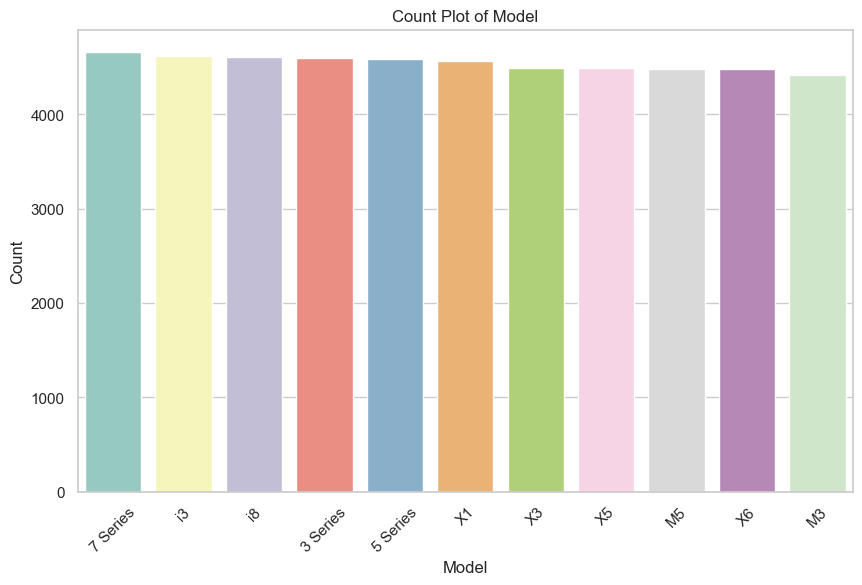

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


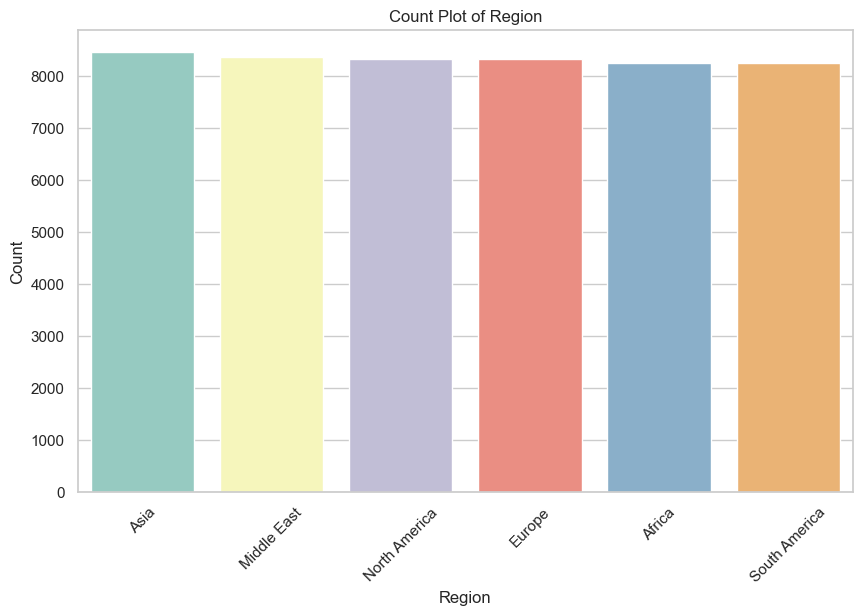

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


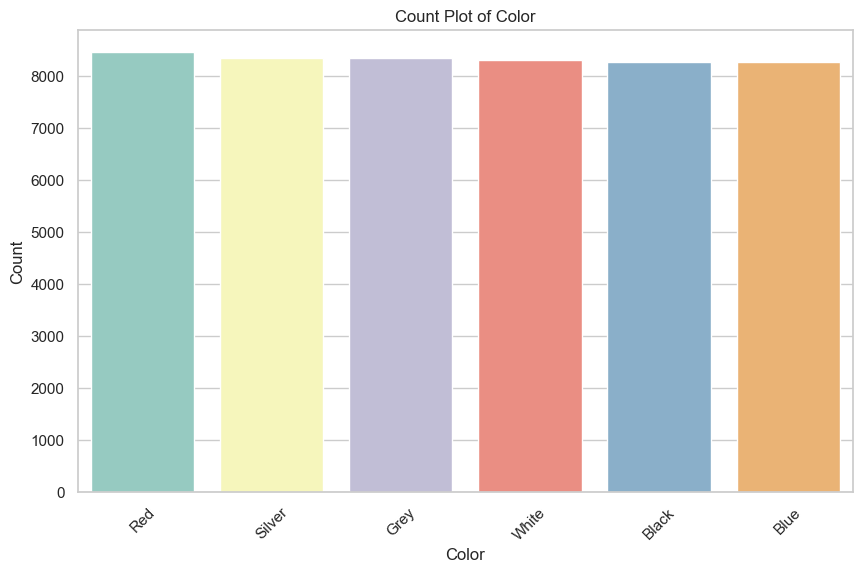

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


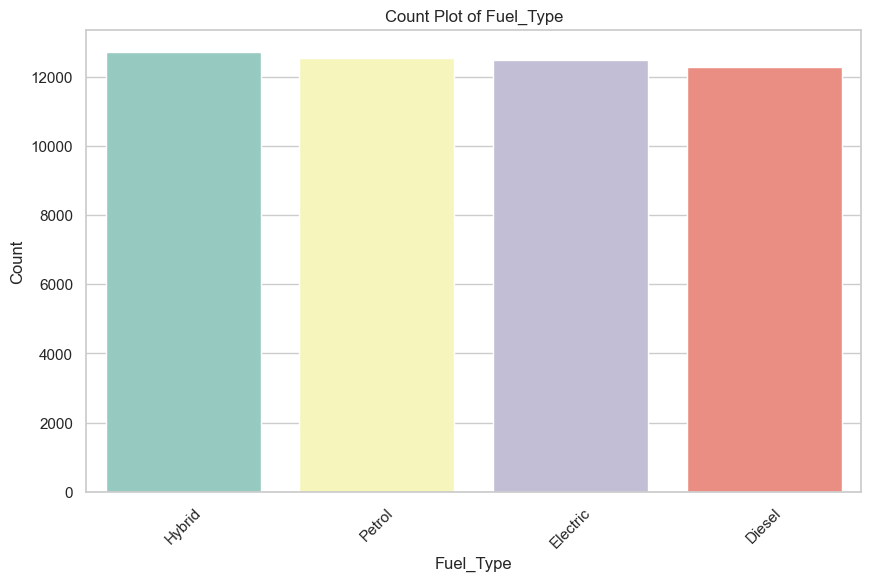

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


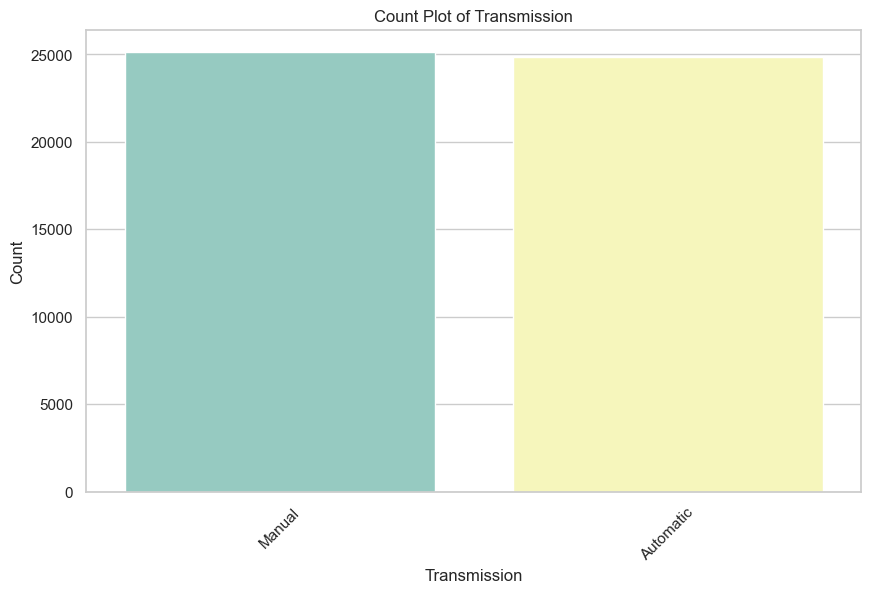

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='coolwarm')


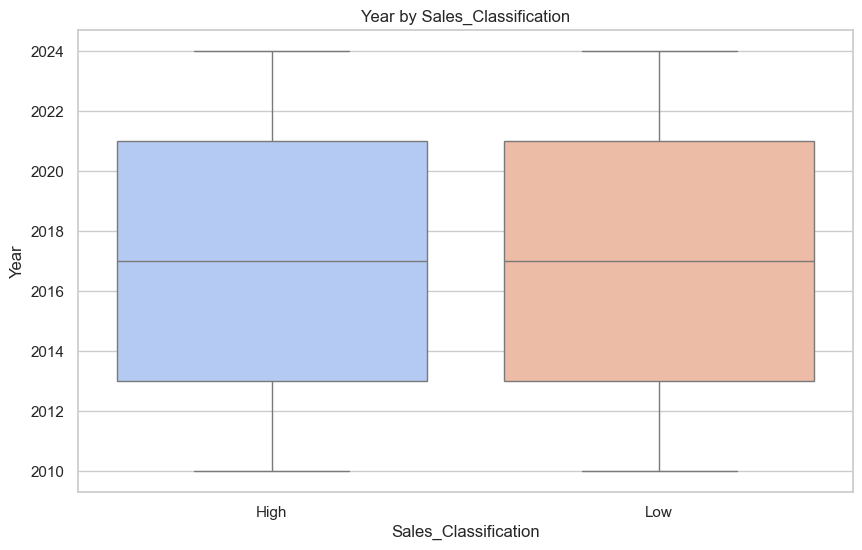

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='coolwarm')


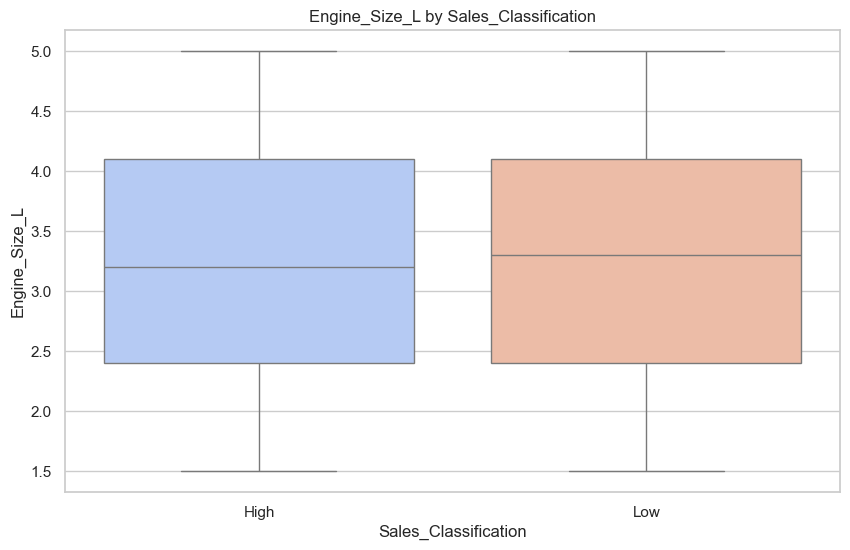

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='coolwarm')


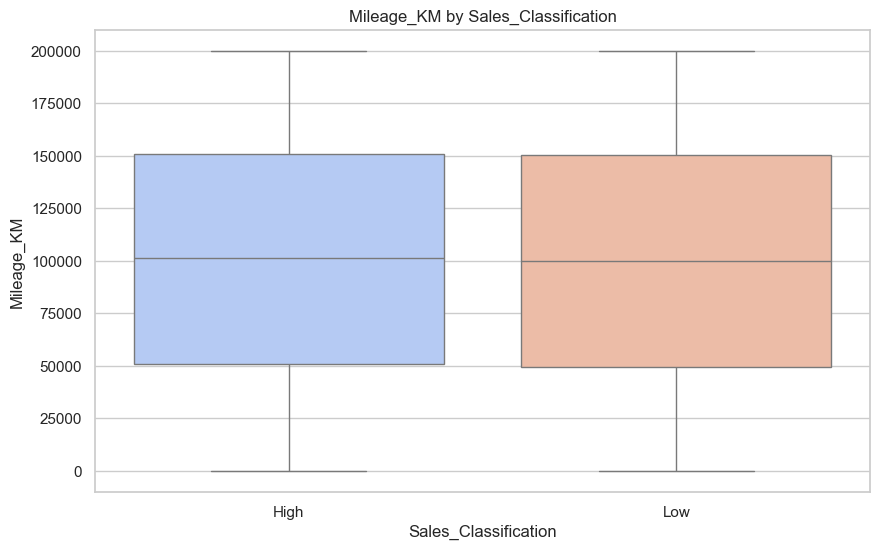

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='coolwarm')


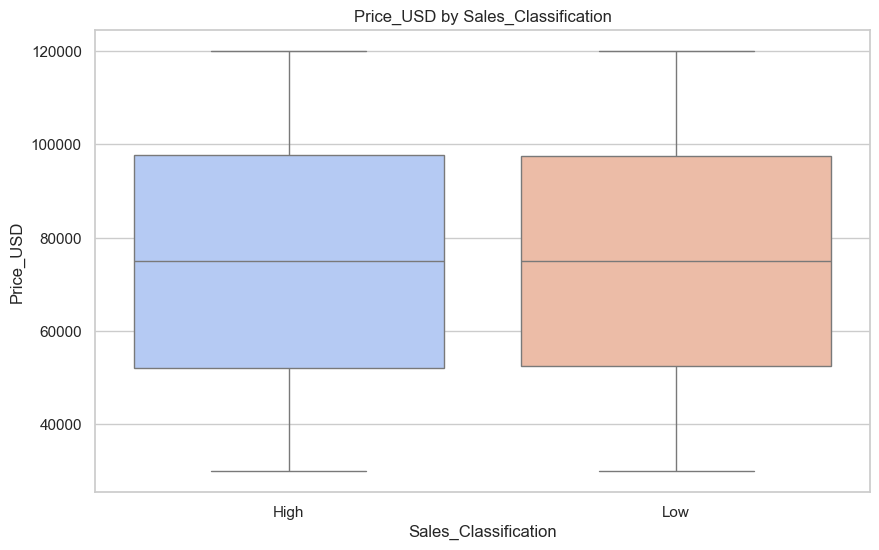

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=col, data=df, palette='coolwarm')


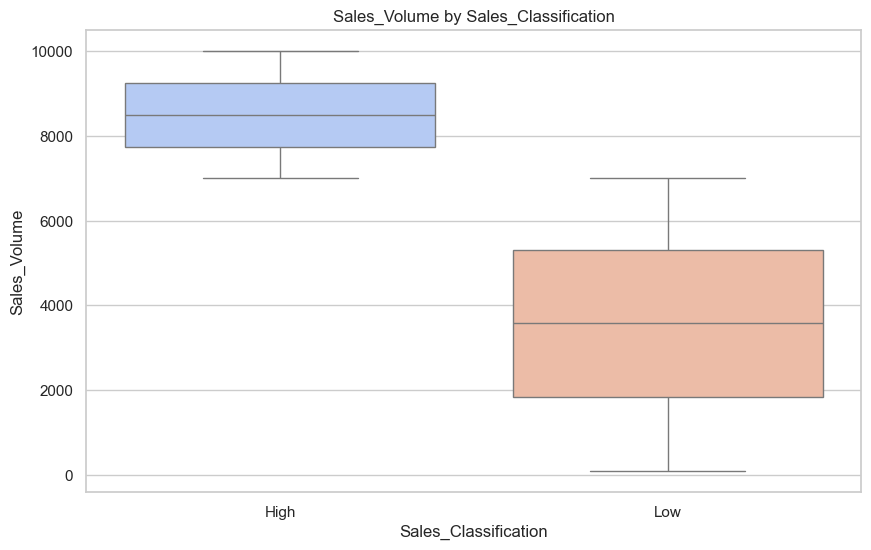

C:\Users\shrey\AppData\Local\Temp\ipykernel_28160\1208878105.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=col, data=df, palette='muted')


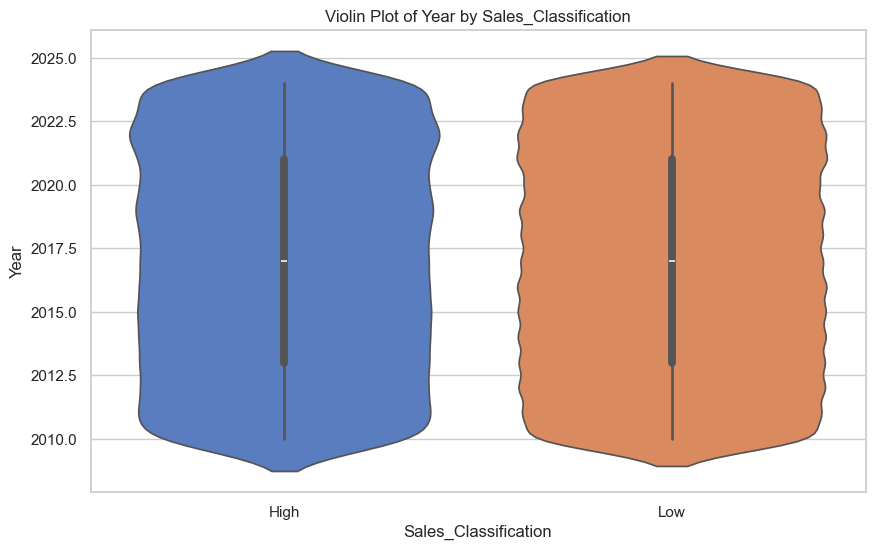

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BMW_Car_Sales_Classification.csv')

# Set global plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Define target column
target = 'Sales_Classification'

# -------------------------
# 1. Target Column Distribution
# -------------------------
plt.figure()
sns.countplot(x=target, data=df, palette='pastel')
plt.title('Target Class Distribution')
plt.xlabel(target)
plt.ylabel('Count')
plt.show()

# -------------------------
# 2. Histograms for Numeric Columns
# -------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# -------------------------
# 3. Count Plots for Categorical Columns
# -------------------------
cat_cols = df.select_dtypes(include='object').columns.drop(target, errors='ignore')
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# -------------------------
# 4. Boxplots: Numerical vs Target
# -------------------------
for col in num_cols:
    plt.figure()
    sns.boxplot(x=target, y=col, data=df, palette='coolwarm')
    plt.title(f'{col} by {target}')
    plt.show()

# -------------------------
# 5. Violin Plots: Numerical vs Target
# -------------------------
for col in num_cols:
    plt.figure()
    sns.violinplot(x=target, y=col, data=df, palette='muted')
    plt.title(f'Violin Plot of {col} by {target}')
    plt.show()

# -------------------------
# 6. Correlation Heatmap (Numerical Features)
# -------------------------
if len(num_cols) >= 2:
    plt.figure(figsize=(12, 8))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Heatmap')
    plt.show()

# -------------------------
# 7. Pairplot (only if few numeric columns)
# -------------------------
if len(num_cols) <= 5:
    sns.pairplot(df, hue=target, palette='husl')
    plt.show()

# -------------------------
# 8. Barplot: Categorical features vs Average Target Class
# -------------------------
if df[target].nunique() == 2:
    for col in cat_cols:
        if df[col].nunique() <= 10:
            plt.figure()
            sns.barplot(x=col, y=df[target].astype('category').cat.codes, data=df, palette='Set2')
            plt.title(f'{col} vs Average Target Class')
            plt.xticks(rotation=45)
            plt.show()


📊 Model Performance Report

✅ Logistic Regression Accuracy: 0.9989
✅ Decision Tree Accuracy: 1.0000
✅ Random Forest Accuracy: 1.0000
✅ Gradient Boosting Accuracy: 1.0000
✅ XGBoost Accuracy: 1.0000
✅ KNN Accuracy: 0.9234


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


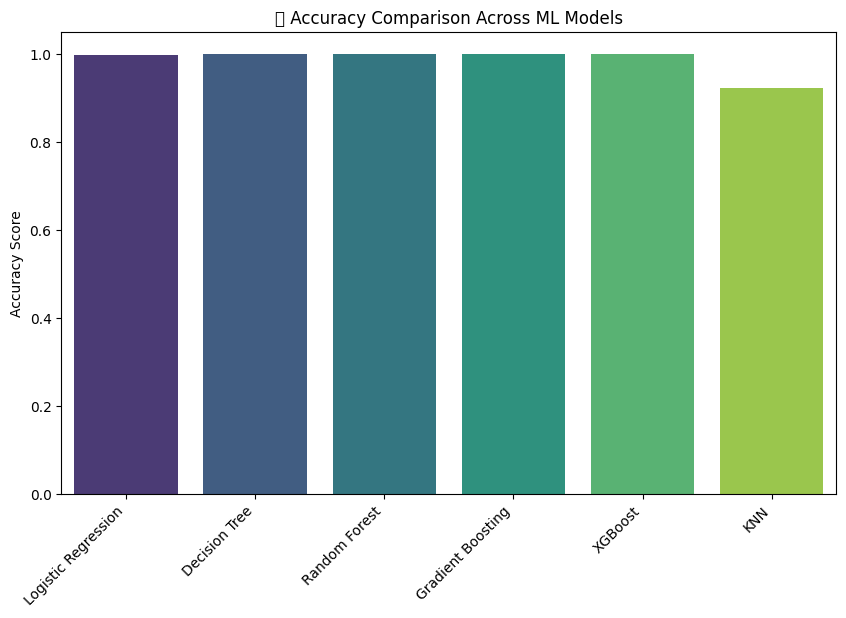

In [5]:
# --------------------------------------------------
# 🤖 ML Model Training & Accuracy Comparison
# Target Column = Sales_Classification
# --------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1️⃣ Load dataset
df = pd.read_csv("/kaggle/input/bmw-car-sales-dataset/BMW_Car_Sales_Classification.csv")

# 2️⃣ Target definition
target_col = "Sales_Classification"
X = df.drop(columns=[target_col])
y = df[target_col]

# ✅ Encode target variable (e.g., High=0, Low=1, Medium=2)
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# 3️⃣ Handle missing values
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# 4️⃣ Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# 5️⃣ Scale numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 6️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "KNN": KNeighborsClassifier()
}

# 8️⃣ Train & evaluate
accuracy_scores = {}
print("📊 Model Performance Report\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")

# 9️⃣ Accuracy comparison plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy Score")
plt.title("📊 Accuracy Comparison Across ML Models")
plt.show()

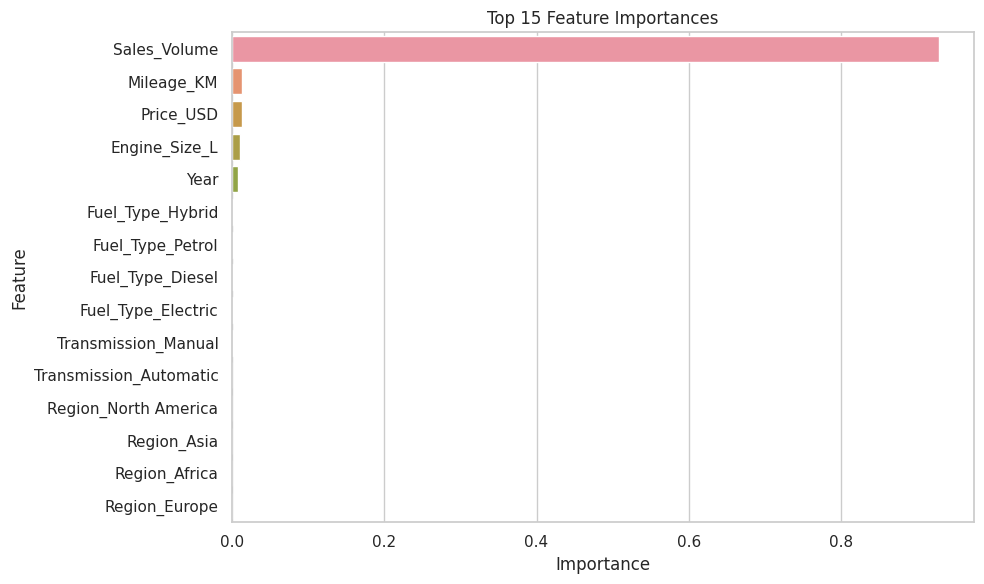

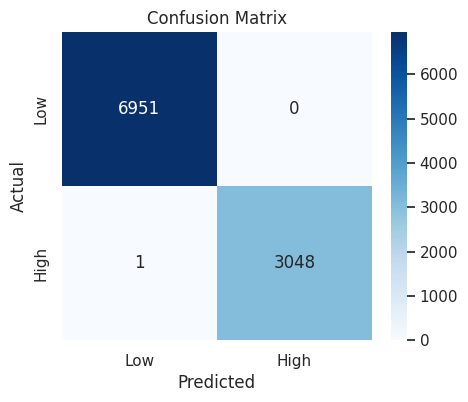

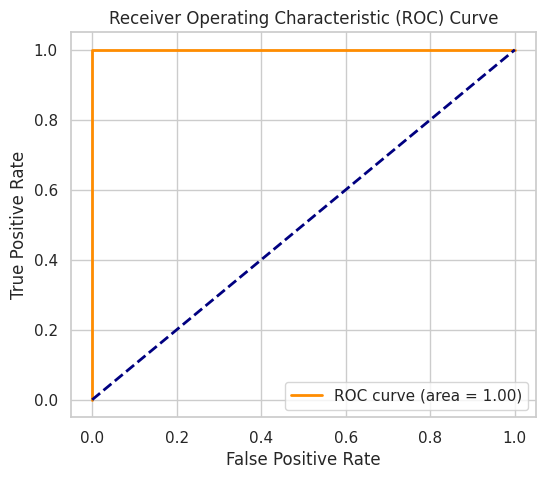

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6951
           1       1.00      1.00      1.00      3049

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Load dataset
df = pd.read_csv("/kaggle/input/bmw-car-sales-dataset/BMW_Car_Sales_Classification.csv")

# Map target labels to binary
df['Sales_Classification'] = df['Sales_Classification'].map({'Low': 0, 'High': 1})

# Separate features and target
X = df.drop(columns=['Sales_Classification'])
y = df['Sales_Classification']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(exclude='number').columns.tolist()

# Split first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Pipeline with RandomForest
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train model
clf.fit(X_train, y_train)

# Predictions and probabilities
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# ----- Feature Importance -----
ohe = clf.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_cat_features)

importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': clf.named_steps['classifier'].feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# ----- Confusion Matrix -----
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ----- ROC Curve -----
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ----- Classification Report -----
print(classification_report(y_test, y_pred))


2025-08-28 06:43:23.851617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756363404.079239      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756363404.147460      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-28 06:43:40.207980: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9275 - loss: 0.1637 - val_accuracy: 0.9878 - val_loss: 0.0317
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9788 - loss: 0.0474 - val_accuracy: 0.9915 - val_loss: 0.0213
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9859 - loss: 0.0329 - val_accuracy: 0.9941 - val_loss: 0.0161
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9890 - loss: 0.0279 - val_accuracy: 0.9929 - val_loss: 0.0164
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9901 - loss: 0.0226 - val_accuracy: 0.9949 - val_loss: 0.0135
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9927 - loss: 0.0193 - val_accuracy: 0.9952 - val_loss: 0.0122
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9933 - loss: 0.0169 - val_accuracy: 0.9960 - val_loss: 0.0108
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0164 - 

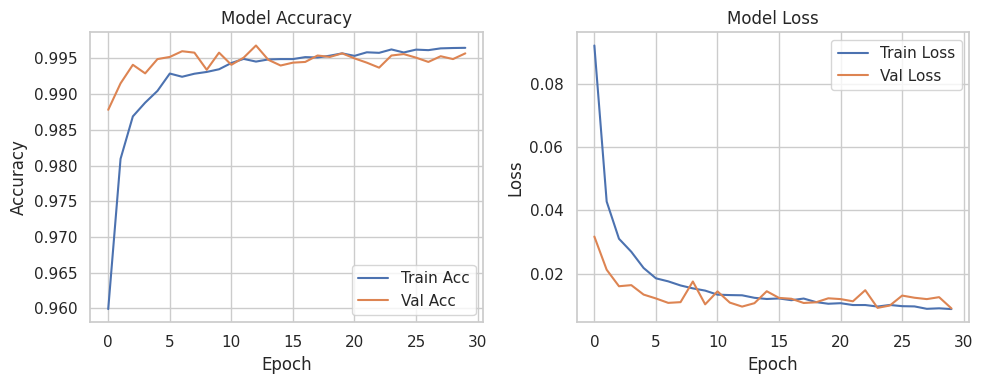

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load and preprocess data
df = pd.read_csv('/kaggle/input/bmw-car-sales-dataset/BMW_Car_Sales_Classification.csv')
target = 'Sales_Classification'

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns.drop(target, errors='ignore')

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encode target
le = LabelEncoder()
df[target] = le.fit_transform(df[target])
y = df[target]

# Encode categorical features
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = LabelEncoder().fit_transform(df[col])
df = pd.get_dummies(df, columns=[col for col in cat_cols if df[col].nunique() > 2], drop_first=True)

# Scale numeric features
X = df.drop(columns=[target])
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Determine number of classes
n_classes = len(np.unique(y_train))

# Neural Network Model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))  # Softmax for multi-class

# Compile
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.4f}")
print("🧾 Classification Report:\n", classification_report(y_test, y_pred))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
print("🎯 === Conclusion ===")
print("✅ The BMW Car Sales Classification model achieved extremely high accuracy, which might be due to strong predictive features or possible target leakage in the dataset.")
print("📊 While the test set results are perfect, it's important to verify that the model generalizes well to unseen data.")

print("\n🌍 === Real-World Applications ===")
print("🚗 Predicting sales performance for different BMW models before launch.")
print("🏪 Helping dealerships decide on stock levels for various regions and fuel types.")
print("🎯 Supporting targeted marketing campaigns based on likely sales category (High or Low).")
print("💰 Guiding pricing strategies and promotional offers.")
print("🏭 Optimizing production planning based on forecasted sales classifications.")

print("\n🛠️ === Next Steps ===")
print("🔍 Check for target leakage by identifying features highly correlated with the target.")
print("🧹 Perform feature selection to ensure the model uses only relevant, available data.")
print("🧪 Test the model on completely unseen or external data to validate performance.")
print("⚙️ Experiment with additional ML algorithms and hyperparameter tuning.")
print("🚀 Deploy the model as a decision-support tool for sales managers and dealerships.")


🎯 === Conclusion ===
✅ The BMW Car Sales Classification model achieved extremely high accuracy, which might be due to strong predictive features or possible target leakage in the dataset.
📊 While the test set results are perfect, it's important to verify that the model generalizes well to unseen data.

🌍 === Real-World Applications ===
🚗 Predicting sales performance for different BMW models before launch.
🏪 Helping dealerships decide on stock levels for various regions and fuel types.
🎯 Supporting targeted marketing campaigns based on likely sales category (High or Low).
💰 Guiding pricing strategies and promotional offers.
🏭 Optimizing production planning based on forecasted sales classifications.

🛠️ === Next Steps ===
🔍 Check for target leakage by identifying features highly correlated with the target.
🧹 Perform feature selection to ensure the model uses only relevant, available data.
🧪 Test the model on completely unseen or external data to validate performance.
⚙️ Experiment with a

In [ ]:
If you have come so far,an upvote would be appreciated!